# Concatenate Dataframe - `pd.concat()`

- By default, it concatenates dataframes vertically.

In [1]:
import pandas as pd

indian_cities = pd.DataFrame({
    'city': ['Hyderabad', 'Delhi']
})

australian_cities = pd.DataFrame({
    'city': ['Sydney', 'Canberra', 'Gold Coast']
})

american_cities = pd.DataFrame({
    'city': ['New york', 'Chicago', 'Miami', 'Atlanta']
})

In [2]:
indian_cities

,city
0,Hyderabad
1,Delhi


In [3]:
australian_cities

,city
0,Sydney
1,Canberra
2,Gold Coast


In [4]:
american_cities

,city
0,New york
1,Chicago
2,Miami
3,Atlanta


In [5]:
# concatenate them -> default -> vertically
cities = pd.concat([indian_cities, american_cities, australian_cities])
cities

,city
0,Hyderabad
1,Delhi
0,New york
1,Chicago
2,Miami
3,Atlanta
0,Sydney
1,Canberra
2,Gold Coast


- Notice that indices are repeated

In [6]:
# ignore_index argument -> ignores individual indexes
cities = pd.concat([indian_cities, american_cities, australian_cities], ignore_index=True)
cities

,city
0,Hyderabad
1,Delhi
2,New york
3,Chicago
4,Miami
5,Atlanta
6,Sydney
7,Canberra
8,Gold Coast


In [8]:
# keys argument
cities = pd.concat(
    [indian_cities, american_cities, australian_cities], 
    keys=['india', 'america', 'australia']
)
cities

city
india     0   Hyderabad
          1       Delhi
america   0    New york
          1     Chicago
          2       Miami
          3     Atlanta
australia 0      Sydney
          1    Canberra
          2  Gold Coast

In [9]:
cities.loc['india']

,city
0,Hyderabad
1,Delhi


In [11]:
cities.loc['india'].iloc[0].values

array(['Hyderabad'], dtype=object)

In [12]:
# concatenate vertically
# use 'axis' argument
company_df = pd.DataFrame({
    'company': ['Microsoft', 'Google']
})
eps_df = pd.DataFrame({
    'eps': [10, 20]
})
stocks_df = pd.concat([company_df, eps_df], axis=1)
stocks_df

,company,eps
0,Microsoft,10
1,Google,20


# Merge Dataframes

- Its like SQL joins.

- Consider the following two dataframes:


In [18]:
temperature_df = pd.DataFrame({
    'city': ['A', 'B', 'C', 'D'],
    'temperature': [23, 30, 25, 29]
})

windspeed_df = pd.DataFrame({
    'city': ['B', 'C', 'A', 'E'],
    'windspeed': [2.5, 2.8, 1.9, 1.1]
})

print(temperature_df)
print(windspeed_df)

  city  temperature
0    A           23
1    B           30
2    C           25
3    D           29
  city  windspeed
0    B        2.5
1    C        2.8
2    A        1.9
3    E        1.1


- To join the above dataframes using `concat()`, it might become difficult because the order of keys are different.

- We can use `merge()`, which is like SQL join.

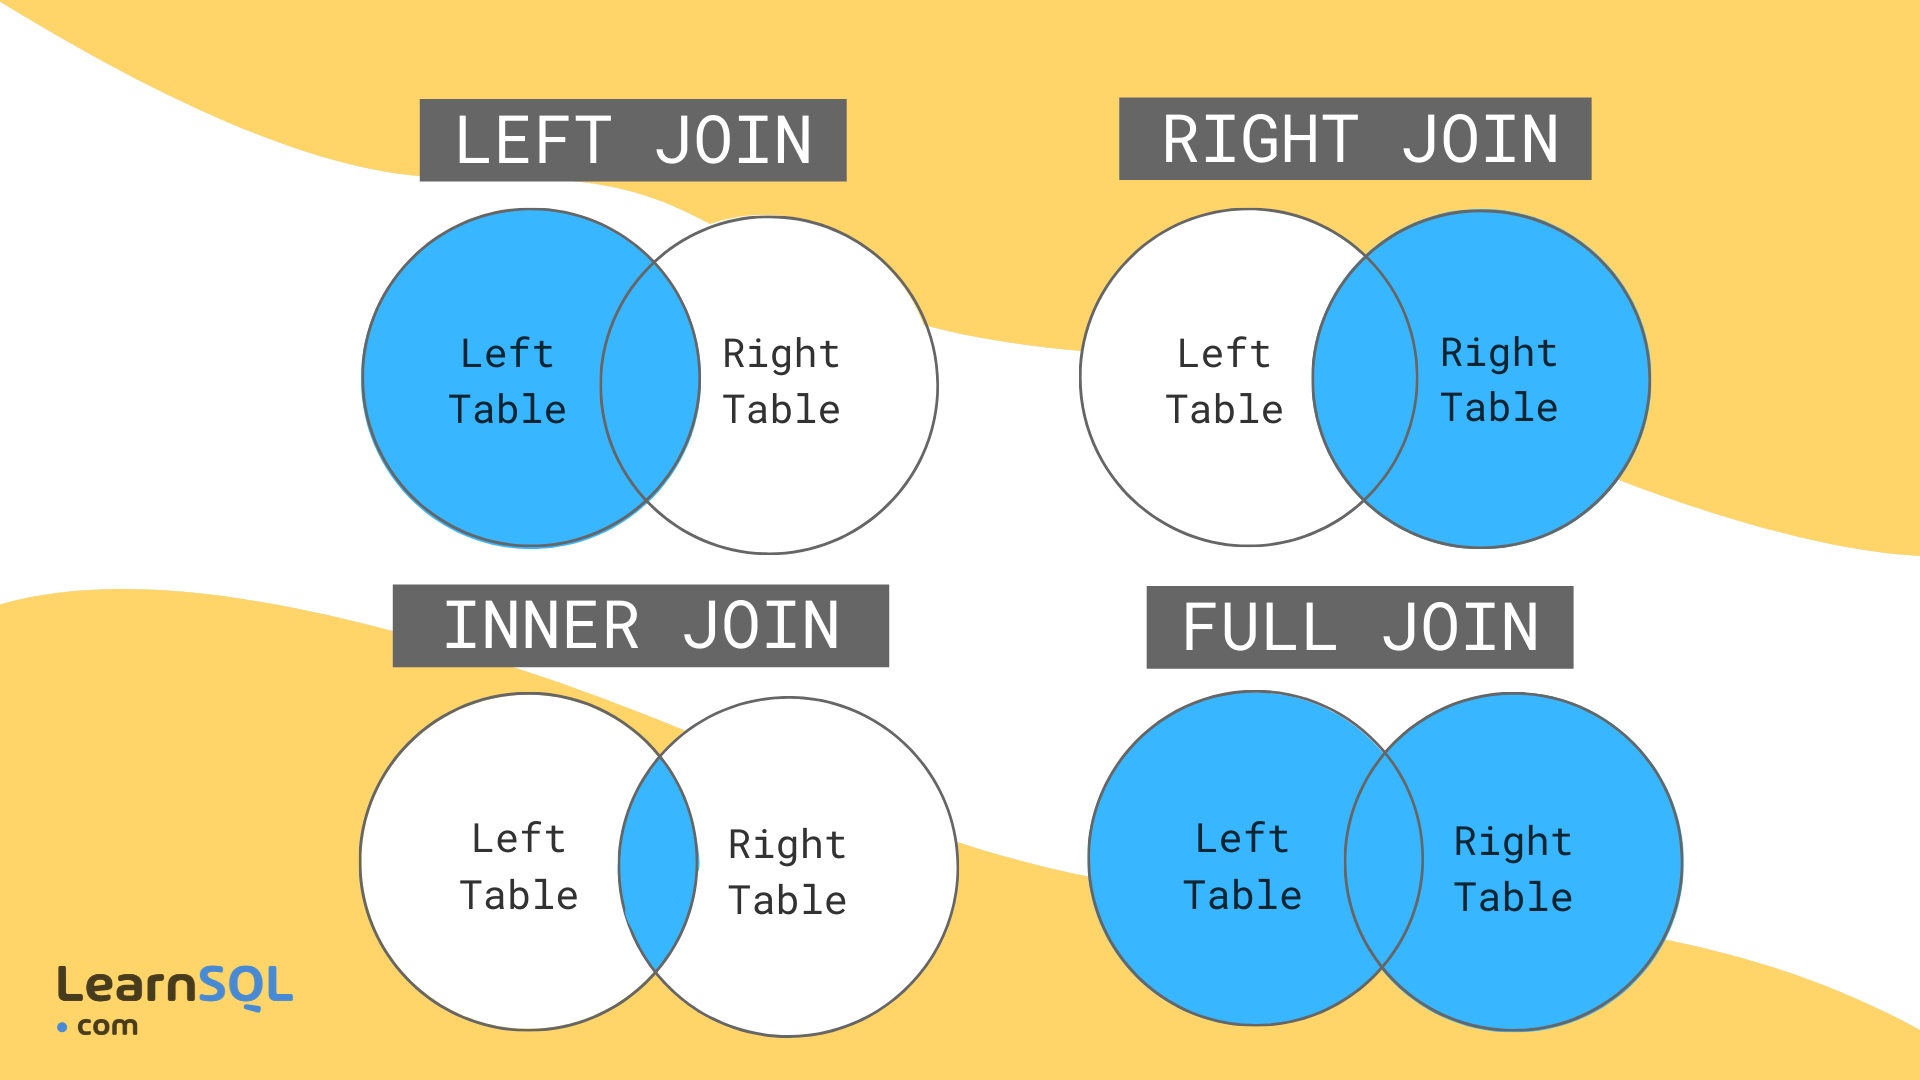

(Full Join is Outer Join)

- `on` argument: specifies merging column.

- `how` argument: specifies joining method. By default, `inner` join is used (intersection).

    - `outer` join (union)
    
    - `left` join
    
    - `right` join
    
- `indicators` argument: adds a `merge` column, which tells how the data came from (from which dataframe it came from).

In [19]:
# inner join (intersection) (default)
merged_data = pd.merge(temperature_df, windspeed_df, on='city')
merged_data

,city,temperature,windspeed
0,A,23,1.9
1,B,30,2.5
2,C,25,2.8


In [20]:
# outer join (union)
pd.merge(temperature_df, windspeed_df, on='city', how='outer')

,city,temperature,windspeed
0,A,23.0,1.9
1,B,30.0,2.5
2,C,25.0,2.8
3,D,29.0,NaN
4,E,NaN,1.1


In [21]:
# left join
pd.merge(temperature_df, windspeed_df, on='city', how='left')

,city,temperature,windspeed
0,A,23,1.9
1,B,30,2.5
2,C,25,2.8
3,D,29,NaN


In [22]:
# right join
pd.merge(temperature_df, windspeed_df, on='city', how='right')

,city,temperature,windspeed
0,B,30.0,2.5
1,C,25.0,2.8
2,A,23.0,1.9
3,E,NaN,1.1


In [27]:
# indicators
pd.merge(temperature_df, windspeed_df, on='city', how='outer', indicator=True)

,city,temperature,windspeed,_merge
0,A,23.0,1.9,both
1,B,30.0,2.5,both
2,C,25.0,2.8,both
3,D,29.0,NaN,left_only
4,E,NaN,1.1,right_only
